## Step 1

### PROBLEM STATEMENT:

Provide pricing recommendations to Elon Musk for the laptop market based on Data Analysis and Mining skills on the given Data Set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("laptop_details.csv")
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df.shape

(720, 4)

## Step 2:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [6]:
if df["MRP"].dtype == object:
    df["MRP"] = df["MRP"].str.replace('₹','').str.replace(',','')
df["MRP"] = df["MRP"].astype(float)


In [7]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    float64
 3   Feature  720 non-null    object 
dtypes: float64(2), object(2)
memory usage: 22.6+ KB


## Step 3:

### Feature Extraction:

In [9]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [10]:
# Creating new columns by extraction of "Product column"

In [11]:
## Created a new column "Brand"

df['Brand'] = df['Product'].apply(lambda x: x.split(" ")[0])     

In [12]:
# Created a column RAM_TYPE

regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

df['RAM_Type'] = df['Feature'].apply(extract_ram_type)

In [13]:
#Create a column "RAM_SIZE"

df['RAM_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('DDR')[0])[-1]))

In [14]:
#Created a new column "STORAGE"

df['Storage'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]))
     

In [15]:
# Create a new column "DISK TYPE"

df['Disk_Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
     

In [16]:
df.head()

,Product,Rating,MRP,Feature,Brand,RAM_Type,RAM_Size,Storage,Disk_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,256,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,512,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8,512,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD


In [17]:
## Creating new columns from "Feature Column"

In [18]:
#Created anothe new column"OS_Type" 

df["OS_Type"] = df["Feature"].apply(lambda x: 'Windows' if 'Windows' in x else'Mac OS' if 'Mac OS' in x else 'Others')

In [19]:
## Create new column "Processor"

regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

df["Processor"] = df["Feature"].apply(extract_processor)

In [20]:
df["Processor"].unique

<bound method Series.unique of 0         Intel Core
1         Intel Core
2         Intel Core
3          AMD Ryzen
4         Intel Core
           ...      
715    Intel Celeron
716        AMD Ryzen
717        AMD Ryzen
718       Intel Core
719       Intel Core
Name: Processor, Length: 720, dtype: object>

In [21]:
df["Processor"].value_counts()

Intel Core       355
AMD Ryzen        307
Intel Celeron     23
Intel Pentium      5
Intel i3           3
AMD Athlon         2
Intel Evo          2
Intel PQC          1
AMD Dual           1
Intel i7           1
Name: Processor, dtype: int64

In [22]:
df.head()

,Product,Rating,MRP,Feature,Brand,RAM_Type,RAM_Size,Storage,Disk_Type,OS_Type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,256,SSD,Windows,Intel Core
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,512,SSD,Windows,Intel Core
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8,512,SSD,Windows,AMD Ryzen
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core


In [23]:
df.shape

(720, 11)

## Step 4:

### Data Analysis:

In [24]:
new_df = df[['MRP','Brand','RAM_Type','RAM_Size','Storage','Disk_Type','OS_Type','Processor']]
new_df.head()

,MRP,Brand,RAM_Type,RAM_Size,Storage,Disk_Type,OS_Type,Processor
0,36990.0,Lenovo,DDR4,8,256,SSD,Windows,Intel Core
1,39990.0,Lenovo,DDR4,8,512,SSD,Windows,Intel Core
2,32990.0,ASUS,DDR4,8,512,SSD,Windows,Intel Core
3,49990.0,HP,DDR4,8,512,SSD,Windows,AMD Ryzen
4,49990.0,ASUS,DDR4,8,512,SSD,Windows,Intel Core


In [25]:
new_df.shape

(720, 8)

In [26]:
num_col=new_df.describe().columns
num_col

Index(['MRP', 'RAM_Size', 'Storage'], dtype='object')

In [27]:
cat_col=new_df.select_dtypes(include=[object])
cat_col.columns

Index(['Brand', 'RAM_Type', 'Disk_Type', 'OS_Type', 'Processor'], dtype='object')

In [28]:
### Univariate Analysis:
## Num_column

In [29]:
num_col

Index(['MRP', 'RAM_Size', 'Storage'], dtype='object')

### MRP

In [30]:
new_df["MRP"].max()

434830.0

In [31]:
new_df["MRP"].min()

14990.0

In [32]:
new_df["MRP"].mean()

81605.8375

In [33]:
new_df["MRP"].median()

59990.0

<AxesSubplot:>

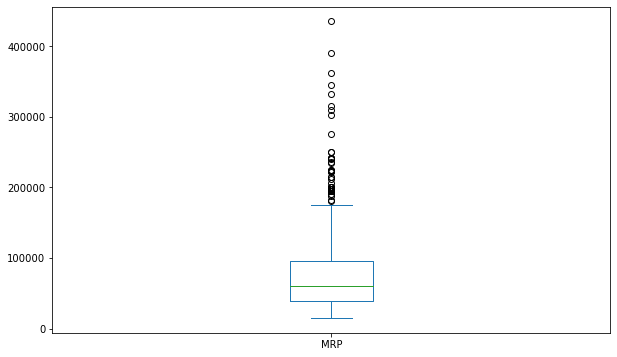

In [34]:
df["MRP"].plot(kind="box", figsize=(10,6))

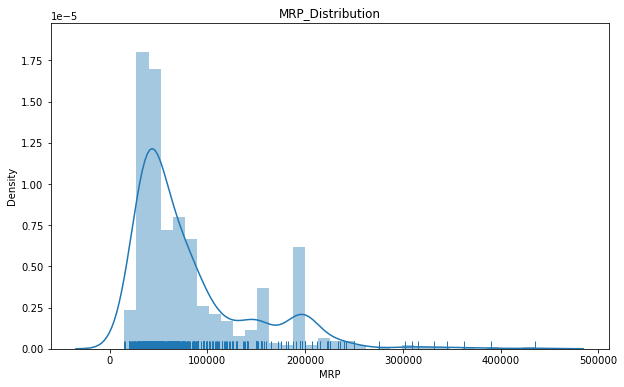

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(new_df["MRP"],rug=True)
plt.title("MRP_Distribution")
plt.show()

### RAM_Size

In [36]:
new_df["RAM_Size"].max()

32

In [37]:
new_df["RAM_Size"].min()

1

In [38]:
new_df["RAM_Size"].mean()

11.066666666666666

In [39]:
new_df["RAM_Size"].median()

8.0

<AxesSubplot:>

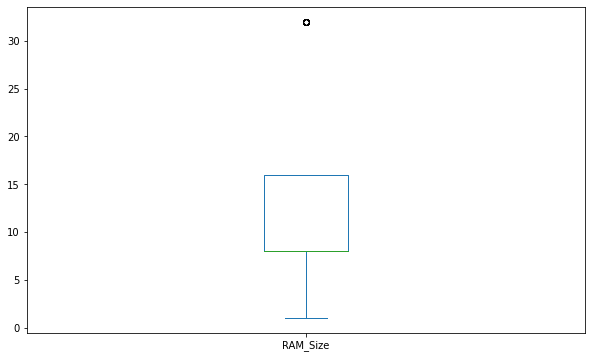

In [40]:
new_df["RAM_Size"].plot(kind="box",figsize=(10,6))

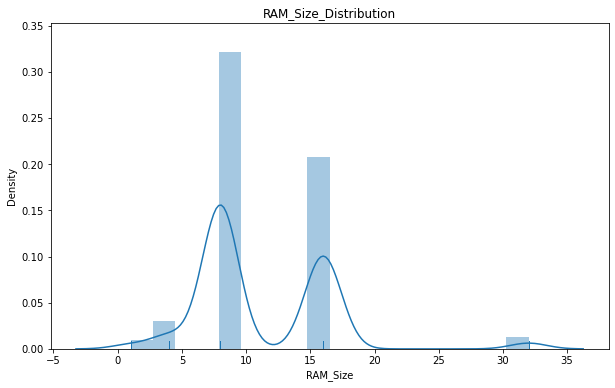

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(new_df["RAM_Size"],rug=True)
plt.title("RAM_Size_Distribution")
plt.show()

### Storage

In [42]:
new_df["Storage"].max()

20211

In [43]:
new_df["Storage"].min()

1

In [44]:
new_df["Storage"].mean()

398.475

In [45]:
new_df["Storage"].median()

512.0

<AxesSubplot:>

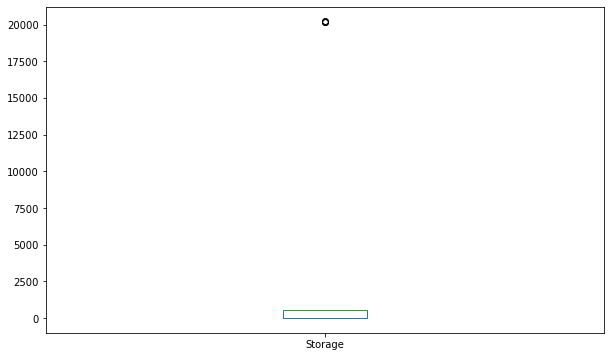

In [46]:
new_df["Storage"].plot(kind="box",figsize=(10,6))

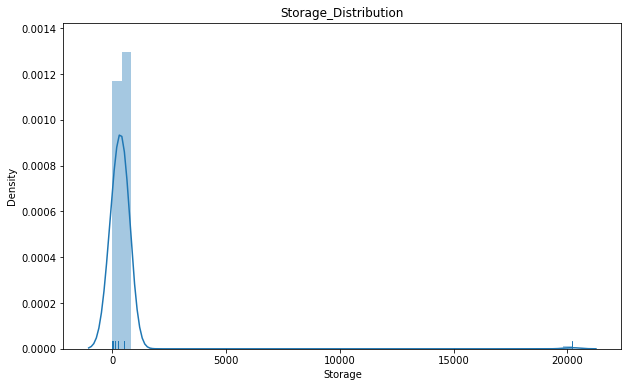

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(new_df["Storage"],rug=True)
plt.title("Storage_Distribution")
plt.show()

In [48]:
## Categorical columns
cat_col.columns

Index(['Brand', 'RAM_Type', 'Disk_Type', 'OS_Type', 'Processor'], dtype='object')

### Brand

<function matplotlib.pyplot.show(close=None, block=None)>

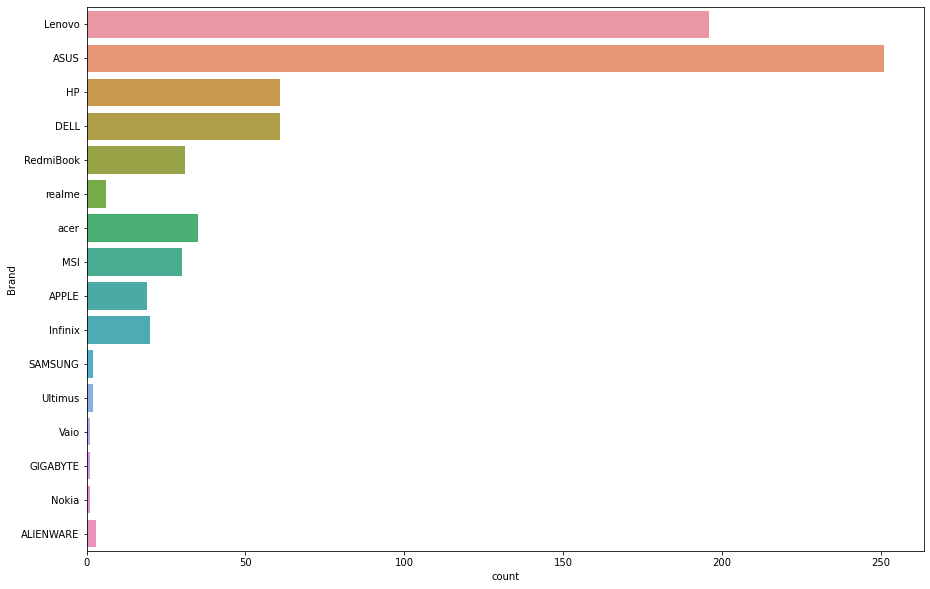

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(y="Brand",data=new_df)
plt.xticks(rotation=360)
plt.show

In [50]:
print("maximum brand count:",new_df["Brand"].value_counts().idxmax(),new_df["Brand"].value_counts().max())
print("minimum brand count:",new_df["Brand"].value_counts().idxmin(),new_df["Brand"].value_counts().min())
print("average brand count:",new_df["Brand"].mode(),new_df["Brand"].value_counts().mode())

maximum brand count: ASUS 251
minimum brand count: Vaio 1
average brand count: 0    ASUS
dtype: object 0    1
dtype: int64


### Disk_Type

<function matplotlib.pyplot.show(close=None, block=None)>

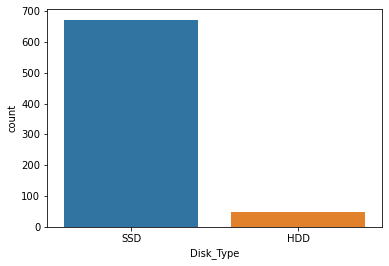

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="Disk_Type",data=new_df)
plt.xticks(rotation=360)
plt.show

In [52]:
print("maximum count of Disk_Type:",new_df["Disk_Type"].value_counts().idxmax(),new_df["Disk_Type"].value_counts().max())
print("mainimum count of Disk_Type:",new_df["Disk_Type"].value_counts().idxmin(),new_df["Disk_Type"].value_counts().min())

maximum count of Disk_Type: SSD 672
mainimum count of Disk_Type: HDD 48


### OS_Type

<function matplotlib.pyplot.show(close=None, block=None)>

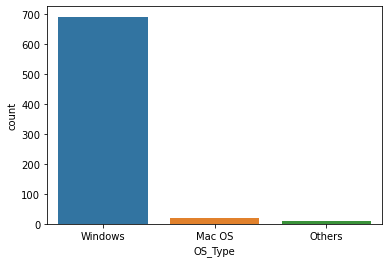

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x="OS_Type",data=new_df)
plt.xticks(rotation=360)
plt.show

In [54]:
print("maximum count of OS_Type:",new_df["OS_Type"].value_counts().idxmax(),new_df["OS_Type"].value_counts().max())
print("mainimum count of OS_Type:",new_df["OS_Type"].value_counts().idxmin(),new_df["OS_Type"].value_counts().min())

maximum count of OS_Type: Windows 690
mainimum count of OS_Type: Others 11


In [55]:
new_df["OS_Type"].value_counts()

Windows    690
Mac OS      19
Others      11
Name: OS_Type, dtype: int64

### RAM_Type

<function matplotlib.pyplot.show(close=None, block=None)>

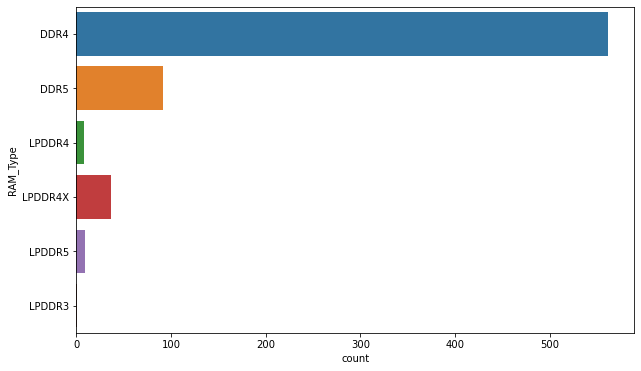

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(y="RAM_Type",data=new_df)
plt.xticks(rotation=360)
plt.show

In [57]:
print("maximum count of RAM_Type:",new_df["RAM_Type"].value_counts().idxmax(),new_df["RAM_Type"].value_counts().max())
print()
print("minimum count of RAM_Type:",new_df["RAM_Type"].value_counts().idxmin(),new_df["RAM_Type"].value_counts().min())
print()
print("average count of RAM_Type:",new_df["RAM_Type"].mode())

maximum count of RAM_Type: DDR4 561

minimum count of RAM_Type: LPDDR3 1

average count of RAM_Type: 0    DDR4
dtype: object


### Processor

<function matplotlib.pyplot.show(close=None, block=None)>

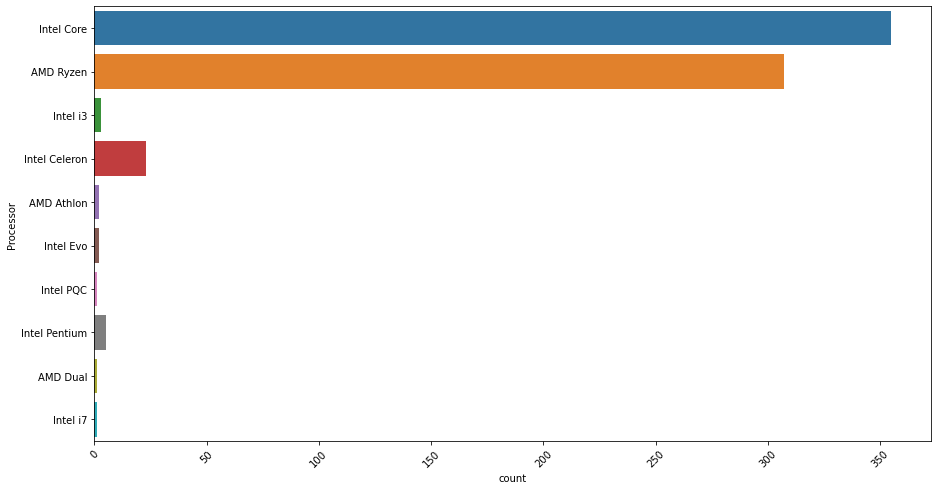

In [58]:
plt.figure(figsize=(15,8))
sns.countplot(y="Processor",data=new_df)
plt.xticks(rotation=45)
plt.show

In [59]:
print("maximum Processor count:",new_df["Processor"].value_counts().idxmax(),new_df["Processor"].value_counts().max())
print()
print("minimum Processor count:",new_df["Processor"].value_counts().idxmin(),new_df["Processor"].value_counts().min())
print()
print("average Processor count:",new_df["Processor"].mode())

maximum Processor count: Intel Core 355

minimum Processor count: Intel PQC 1

average Processor count: 0    Intel Core
dtype: object


### Bivariate Analysis

In [60]:
new_df.columns

Index(['MRP', 'Brand', 'RAM_Type', 'RAM_Size', 'Storage', 'Disk_Type',
       'OS_Type', 'Processor'],
      dtype='object')

In [61]:
### First check how the different Features are correlated with the price(MRP) using correlation matrix

In [62]:
new_df.corr()        ## Since,corelation gives statistical measure hence the correlation only between numerical columns.

,MRP,RAM_Size,Storage
MRP,1.000000,0.700065,-0.144640
RAM_Size,0.700065,1.000000,-0.121379
Storage,-0.144640,-0.121379,1.000000


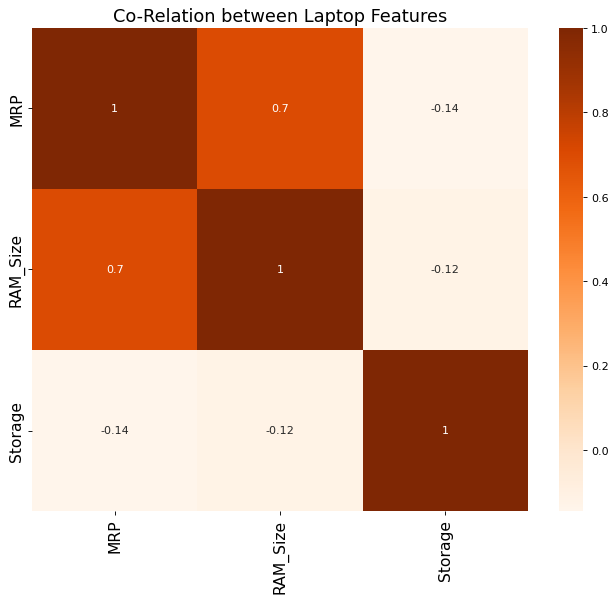

In [63]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(new_df.corr(), cmap='Oranges', annot=True)
plt.title('Co-Relation between Laptop Features', fontsize=16)         
plt.xticks(fontsize= 14, rotation = 90)
plt.yticks(fontsize= 14)
plt.show()

1.)RAM_Size explains 70% of the variation in MRP.There is a strong linear relationship between MRP and RAM_Size, where changes     in RAM_Size can explain 70% of the variability in MRP i,e RAM_Size has the largest impact on MRP among the variables being       considered.

#### MRP VS RAM_Size

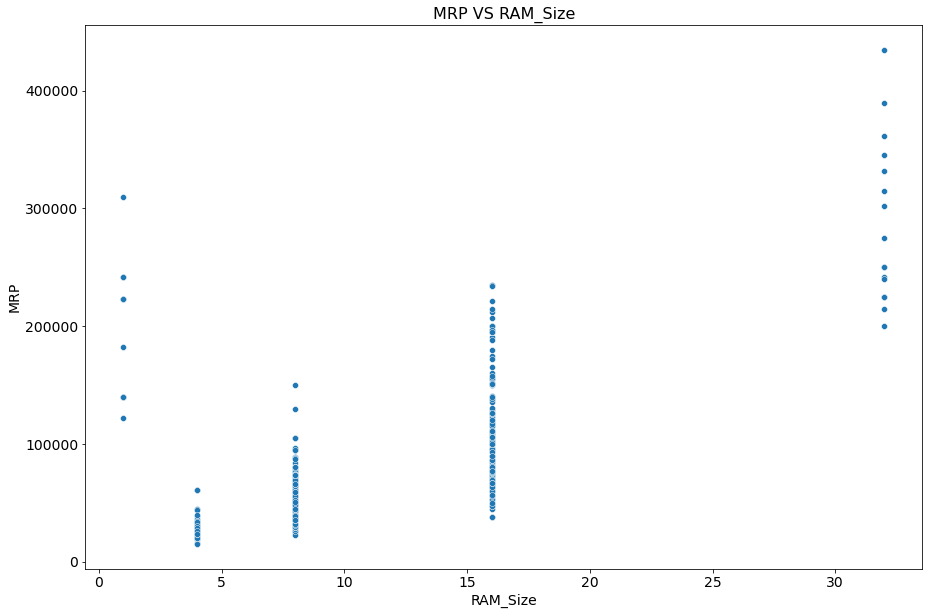

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(y="MRP",x="RAM_Size",data=new_df)
plt.title("MRP VS RAM_Size",fontsize=16)
plt.xticks(fontsize=14,rotation=360)
plt.yticks(fontsize=14)
plt.ylabel("MRP",fontsize=14)
plt.xlabel("RAM_Size",fontsize=14)
plt.show()